# Impainting Generative Adverserial Network
## Project by: Anna Wang, Jimmy Yang and Phillip Chen

## Importing Dataset

Our dataset comes from Hugging Face Dataset cats_vs_dogs: https://huggingface.co/datasets/microsoft/cats_vs_dogs

Instructions for how to import the dataset are included in the README

In [ ]:
# uncomment code blocks below when needed
# !huggingface-cli login
# !pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("microsoft/cats_vs_dogs")

print(f"Train dataset size: {len(ds['train'])}")
print(ds['train'])

README.md:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/330M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/23410 [00:00<?, ? examples/s]

Train dataset size: 23410


In [20]:
import numpy as np
# filtering data by cats and dogs
data = ds['train']
dogs = data.filter(lambda isDog: isDog['labels'] == 1)
cats = data.filter(lambda isDog: isDog['labels'] == 0)
print("Dataset size: " + str(len(data)))

print("Total dataset size:", len(data))
print("Dogs:", len(dogs))
print("Cats:", len(cats))

# Split each class into train/test
dog_split = dogs.train_test_split(test_size=0.2, seed=200)
cat_split = cats.train_test_split(test_size=0.2, seed=200)

# Get subsets
train_dog = dog_split['train']['image']
test_dog = dog_split['test']['image']
train_cat = cat_split['train']['image']
test_cat = cat_split['test']['image']

print("Dog Train Set: " + str(len(train_dog)))
print("Dog Test Set: " + str(len(test_dog)))

print("Cat Train Set: " + str(len(train_cat)))
print("Cat Test Set: " + str(len(test_cat)))


Dataset size: 23410
Total dataset size: 23410
Dogs: 11669
Cats: 11741
Dog Train Set: 9335
Dog Test Set: 2334
Cat Train Set: 9392
Cat Test Set: 2349


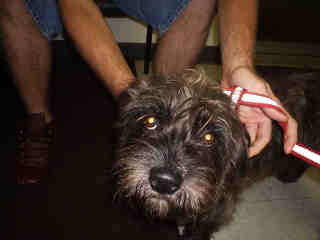

In [21]:
train_dog[1]